<a href="https://colab.research.google.com/github/supriyakarande/Machine-Learning/blob/master/Live_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests
import pandas as pd
endtime =int(time.time())
starttime=int(time.time())-86400*365  #one year back
code='IDEA.NS'
url="https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history".format(code,starttime,endtime)
r = requests.get(url)
with open("{}.csv".format(code), 'wb') as f:
  f.write(r.content)
data =pd.read_csv("{}.csv".format(code),index_col=0)
data=data['Close']
data=data.dropna()



predicted=8.871200, expected=10.500000
Test MSE: 0.253
[11.07696175]
[11.49479097]
[12.04640593]
[12.63044818]
[13.18943675]


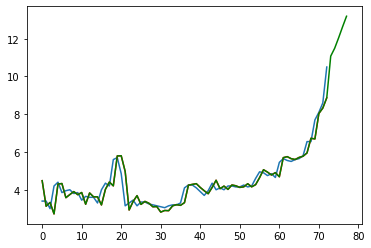

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
X = data.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#print(data())
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
#plt.show()

#predict in future
#predictions= list()
for i in range(5):
	model = ARIMA(history, order=(10,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(yhat)
	print(yhat)

plt.plot(predictions, color='green')
plt.show()

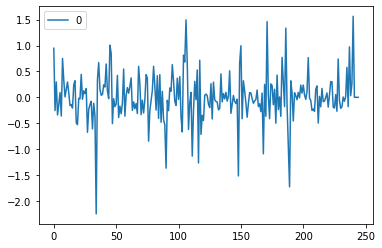

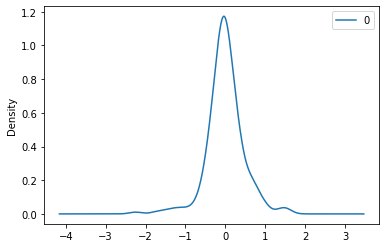

                0
count  245.000000
mean     0.003018
std      0.463529
min     -2.251134
25%     -0.206588
50%     -0.017859
75%      0.220533
max      1.565373


In [ ]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())